In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **A.PHƯƠNG PHÁ K-NN CHO PHÂN LOẠI NHIỀU LỚP**




In [3]:
def distance(array,value):
    return np.linalg.norm(array-value,ord=2,axis=1)

def find_nearest_indexes(array,value,k):
    return np.argsort(distance(array,value))[:k]

def highest_rank(arr):
    count_num = {}
    for i in arr:
      count_num[i] = arr.count(i)
    return max(count_num,key= count_num.get)

##**Ví dụ A.1**

In [4]:
N = 500
d= 2
C=3

means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]

X0 = np.random.multivariate_normal(means[0],cov,N)
X1 = np.random.multivariate_normal(means[1],cov,N)
X2 = np.random.multivariate_normal(means[2],cov,N)

X = np.concatenate((X0,X1,X2),axis = 0).T
X = np.concatenate((np.ones((1,N*C)),X),axis = 0)

orginal_label = np.asarray([0]*N+[1]*N+[2]*N).T

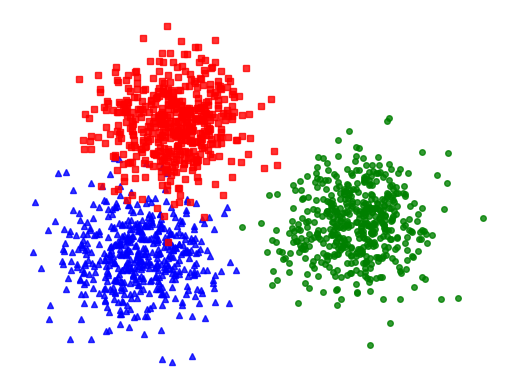

In [5]:
def display(X,label):
    X0 = X[:,label==0]
    X1 = X[:,label==1]
    X2 = X[:,label==2]
    plt.plot(X0[0,:],X0[1,:],'b^',markersize = 4,alpha = .8)
    plt.plot(X1[0,:],X1[1,:],'go',markersize = 4,alpha = .8)
    plt.plot(X2[0,:],X2[1,:],'rs',markersize = 4,alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

display(X[1:,:],orginal_label)

In [6]:
# lấy 400 mẫu dữ liệu đầu làm training và 100 mẫu còn lại làm validation

X_train = np.concatenate((X0[:400],X1[:400],X2[:400]),axis = 0)

Y_train = np.concatenate((orginal_label[:400],orginal_label[500:900],orginal_label[1000:1400]),axis =0)
X_val = np.concatenate((X0[400:],X1[400:],X2[400:]),axis = 0)
Y_val = np.concatenate((orginal_label[400:500],orginal_label[900:1000],orginal_label[1400:1500]),axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

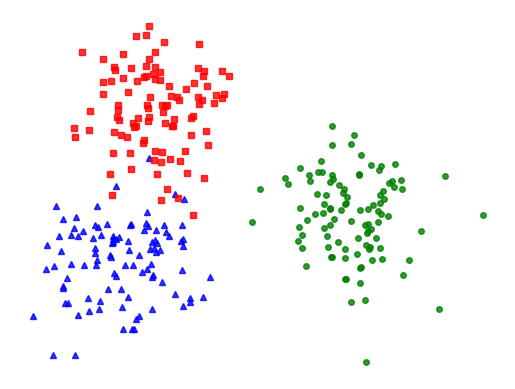

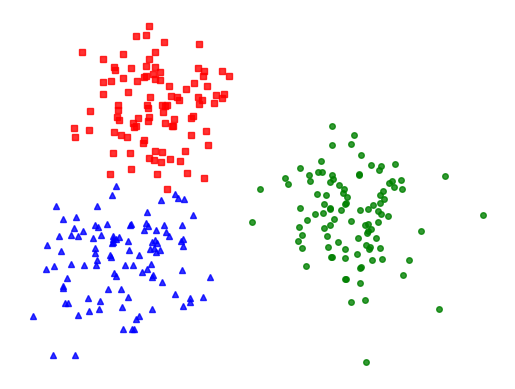

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       1.00      1.00      1.00       100
           2       0.99      0.96      0.97       100

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [7]:
K= 20
y_pred = np.zeros(len(Y_val)).astype(int)

for j in range(len(Y_val)):
    indexes = find_nearest_indexes(X_train,X_val[j],K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(Y_train[indexes[i]])
    y_pred[j] = highest_rank(y_nearest)

print(y_pred)
print(Y_val)
display(X_val.T,Y_val)
display(X_val.T,y_pred)
print(classification_report(Y_val, y_pred))

##**Ví dụ A.2**

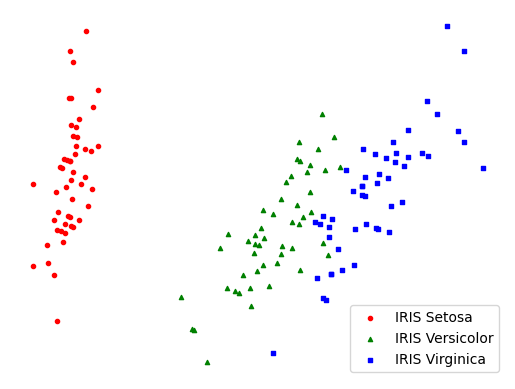

In [8]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.utils import shuffle
iris = datasets.load_iris()
X = iris.data[:,:4] # take 4 features
Y = iris.target


X_norm = (X-X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [9]:
# chia dữ liệu
k = 6
x_train = np.concatenate((X_norm[0:40],X_norm[50:90],X_norm[100:140]),axis = 0)
y_train = np.concatenate((Y[0:40],Y[50:90],Y[100:140]),axis = 0)
x_train,y_train = shuffle(x_train,y_train)

x_val = np.concatenate((X_norm[40:50],X_norm[90:100],X_norm[140:150]),axis = 0)
y_val = np.concatenate((Y[40:50],Y[90:100],Y[140:150]),axis = 0)

y_pred = np.zeros(len(y_val)).astype(int)
for j in range(len(x_val)):
    indexes = find_nearest_indexes(x_train,x_val[j],K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(y_train[indexes[i]])
    y_pred[j] = highest_rank(y_nearest)

print(y_pred)
print(y_val)
print(classification_report(y_val, y_pred))


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#**B.HỒI QUY SOFTMAX (MULTINOMIAL LOGISTIC REGRESSION)**

##**Ví dụ B.1**

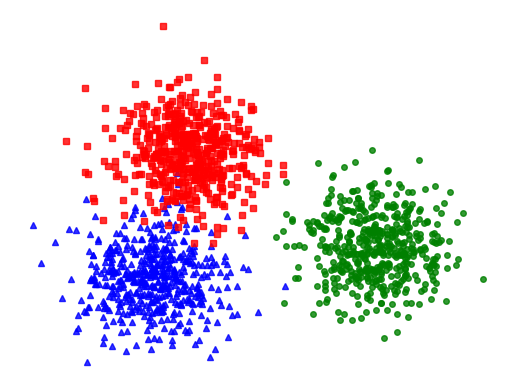

In [10]:
N = 500
d= 2
C=3

means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]

X0 = np.random.multivariate_normal(means[0],cov,N)
X1 = np.random.multivariate_normal(means[1],cov,N)
X2 = np.random.multivariate_normal(means[2],cov,N)

X = np.concatenate((X0,X1,X2),axis = 0).T
X = np.concatenate((np.ones((1,N*C)),X),axis = 0)
orginal_label = np.asarray([0]*N+[1]*N+[2]*N).T

display(X[1:,:],orginal_label)

In [11]:
# hàm chuyển từ một vector dữ liệu sang dạng one hot coding

from scipy import sparse

def convert_labels(y,C =C):
  Y = sparse.coo_matrix((np.ones_like(y),
                        (y,np.arange(len(y)))),shape = (C,len(y))).toarray()
  return Y


def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z,axis = 0,keepdims=True))
  A = e_Z / e_Z.sum(axis = 0)
  return A

def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z / e_Z.sum(axis = 0)
  return A

def softmax_regression(X,y,w_init,eta,lam = 0.0001,tol = 1e-4,max_count = 10000):
  w = [w_init]
  C = w_init.shape[1]
  Y = convert_labels(y,C)

  it =0
  N = X.shape[1]
  d = X.shape[0]

  count = 0
  check_w_after = 20
  while count < max_count:
    # mix data
    mix = np.random.permutation(N)
    for i in mix:
      xi = X[:,i].reshape(d,1)
      yi = Y[:,i].reshape(C,1)
      ai = softmax_stable(np.dot(w[-1].T,xi))
      w_new = w[-1] + eta*xi.dot((yi-ai).T) - 2*lam*w[-1]
      count +=1
      # stopping criteria
      if count%check_w_after == 0:
        if np.linalg.norm(w_new - w[-check_w_after]) < tol:
          return w
      w.append(w_new)
  return w

def cost(X,Y,w,lam):
  A = softmax_stable(X.T.dot(w))
  return -np.sum(Y*np.log(A))+w.T.dot(w)*lam

def predict(w,X):
  A = softmax_stable(X.T.dot(w))
  return np.argmax(A,axis =1)

eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d,C)

W= softmax_regression(X,orginal_label,w_init,eta)
print(W[-1])

[[ 4.51728742 -2.34526199 -2.35452466]
 [-0.63954725  1.12514801 -0.57128792]
 [-0.44848998 -0.69956331  1.21041927]]


##**Ví dụ B.2**

###*chương trình tự xây dựng các hàm/phương thức từ numpy:*

In [12]:
# lấy lại dữ liệu A2

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.utils import shuffle
iris = datasets.load_iris()
X = iris.data[:,:4] # take 4 features
Y = iris.target

X_norm = (X-X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# chia dữ liệu
x_train = np.concatenate((X_norm[Y ==0][0:40],X_norm[Y==1][0:40],X_norm[Y==2][0:40]),axis =0)
y_train = np.concatenate((Y[Y ==0][0:40],Y[Y==1][0:40],Y[Y==2][0:40]),axis =0)

x_test = np.concatenate((X_norm[Y ==0][40:50],X_norm[Y==1][40:50],X_norm[Y==2][40:50]),axis =0)
y_test = np.concatenate((Y[Y ==0][40:50],Y[Y==1][40:50],Y[Y==2][40:50]),axis =0)
x_train,y_train = shuffle(x_train,y_train)

eta = 0.05
x_train = np.concatenate((np.ones((x_train.shape[0],1)),x_train),axis = 1).T
x_test = np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis = 1).T
print(x_test.shape)
d = x_train.shape[0]
C = 3
W_init = np.random.randn(d,C)
W = softmax_regression(x_train,y_train,W_init,eta)
print(W[-1])

y_pred = predict(W[-1],x_test)
print(classification_report(y_test, y_pred))

(5, 30)
[[ 1.98244699  0.32977435 -2.40240676]
 [-0.63007564  0.04961515  0.32246568]
 [ 2.0130429  -1.35675237 -0.69305785]
 [-4.99768509  0.97484752  4.16300436]
 [-2.08727559 -0.02064844  2.39640621]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###*Chương trình Python với các hàm/phương thức từ thư viện Scikit-Learn*

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model,model_selection
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:,:4] # take 4 features
Y = iris.target

X_norm = (X-X.min())/(X.max() - X.min())

x_train,x_test,y_train,y_test = model_selection.train_test_split(X_norm,Y,test_size=0.2,random_state= 2)

#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

lorg = LogisticRegression(solver='sag',multi_class='multinomial',max_iter = 5000)
lorg.fit(x_train,y_train)
y_pred = lorg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9
[[14  0  0]
 [ 0  5  3]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.62      0.77         8
           2       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.91      0.88      0.87        30
weighted avg       0.93      0.90      0.90        30



##**Ví dụ B.3(Bài tập thực hành 2)**

In [14]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
n_samples = 20000
X,y = fetch_20newsgroups_vectorized(subset='all',return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

train_sample, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

logr = LogisticRegression(solver='sag',multi_class='multinomial',max_iter = 8)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8244031830238727
[[68  0  0  0  0  0  0  0  0  1  0  1  0  1  0  4  0  2  0  3]
 [ 0 79  3  1  0  5  2  0  0  0  0  1  1  1  1  1  0  1  0  1]
 [ 0  5 79  5  1  4  2  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  4  8 68  4  1  4  1  1  0  0  1  2  2  0  0  0  1  1  0]
 [ 0  3  2  8 74  1  2  0  0  0  0  0  3  0  0  1  1  1  0  0]
 [ 0  4  7  3  1 81  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  1 83  3  0  1  1  2  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2 92  0  0  0  0  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  6 85  1  0  0  0  1  1  0  0  0  2  0]
 [ 0  1  0  1  0  1  2  0  0 87  4  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  3 92  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  1  1  4  2  0  1  2  1 82  0  0  0  0  2  1  0  0]
 [ 0  4  0  1  1  1  2  4  0  0  0  0 84  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  3  2  1  0  1  1 80  3  1  0  2  1  0]
 [ 1  1  0  0  1  2  2  0  0  0  0  0  0  3 88  1  0  0  0  0]
 [ 2  3  0  0  1  3  0  0  0  0  1  

##**Ví dụ B.4(Bài tập thực hành 3)**

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
filetpath = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'

glass_df = pd.read_csv(filetpath)
glass_df.columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

glass_types = glass_df['Type'].unique()
print(glass_types)
print(glass_df['Type'].value_counts())

X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df[glass_df.columns[-1]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_1,y_1,test_size=0.25,random_state=42)

logr = LogisticRegression(solver = 'sag',multi_class='multinomial',max_iter = 20000)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 2 3 5 6 7]
Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64
0.6851851851851852
[[ 9  4  0  0  0  0]
 [ 4 17  0  1  0  0]
 [ 3  1  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  2  0  0  1  0]
 [ 0  1  0  1  0  7]]
              precision    recall  f1-score   support

           1       0.56      0.69      0.62        13
           2       0.68      0.77      0.72        22
           3       0.00      0.00      0.00         4
           5       0.60      1.00      0.75         3
           6       1.00      0.33      0.50         3
           7       1.00      0.78      0.88         9

    accuracy                           0.69        54
   macro avg       0.64      0.60      0.58        54
weighted avg       0.67      0.69      0.66        54



###**Ví dụ 4**

In [16]:
import os
import numpy as np

datapath = '/content/drive/MyDrive/data'
# train path
train_images_path = os.path.join(datapath, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(datapath, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(datapath, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(datapath, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path, labels_path,num_images,shuffle = False,_is= True,image_size = 28):
    import gzip
    # open file trainging to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these not data
    f_images.read(16)

    real_num = num_images if not shuffle else (5000 if _is else 10000)
    # read all data to a buffer
    buf_images = f_images.read(image_size * image_size * real_num)

    #images
    images = np.frombuffer(buf_images,dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num,image_size,image_size,)
    # labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros(real_num).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels,dtype=np.uint8).astype(np.int64)
    if shuffle is True:
        rand_id = np.random.randint(real_num,size= num_images)
        images = images[rand_id,:]
        labels = labels[rand_id,]
    images = images.reshape(num_images,image_size*image_size)
    return images,labels

train_images,train_labels = get_mnist_data(train_images_path,train_labels_path,5000,shuffle=True)
test_images,test_labels = get_mnist_data(test_images_path,test_labels_path,10000,shuffle=True,_is=False)

print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

# convert matrix to image

def get_image(image):
    return image.reshape(28,28)

def convert_labels(y,C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
                        (y,np.arange(len(y)))),shape = (C,len(y))).toarray()
    return Y

def _softmax_regression(X,Y,theta,lamda= 0.5,interations = 20,learning_rate =1e-4,batch_size = 200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta
    d,N = X.shape
    for iter_ in range(interations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:,i].reshape(d,1)
            yi = Y[:,i].reshape(10,1)
            ai = softmax_stable(np.dot(_theta.T,xi))
            _theta += learning_rate*xi.dot((yi-ai).T)
            if (iter_*N +i)% batch_size ==0:
              Y_hat=np.dot(_theta.T,X)
              loss = log_loss(Y,Y_hat)
              losses.append(loss)
              print(loss)
        Y_hat = np.dot(_theta.T,X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta,losses


(5000, 784) (5000,)
(10000, 784) (10000,)


5 5


<Figure size 640x480 with 0 Axes>

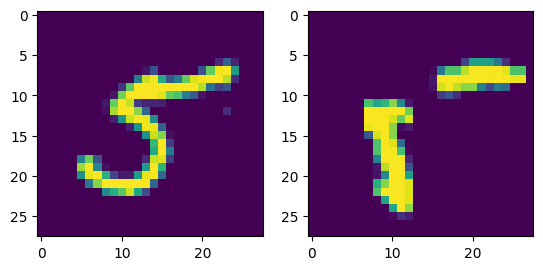

In [17]:
import random as rd
import matplotlib.pyplot as plt

index = rd.randint(0,1000)
print(train_labels[index],test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()


In [18]:
X_train = np.concatenate((np.ones((1,train_images.shape[0])),train_images.T),axis = 0)
Y_train = convert_labels(train_labels,10)
print(X_train.shape,Y_train.shape)
theta = np.zeros((X_train.shape[0],10))
opt_theta,losses = _softmax_regression(X_train,Y_train,theta)
print('training success: ',opt_theta.shape,len(losses))

(785, 5000) (10, 5000)
7025.493772593732
4541.703992516487
619.9508382928151
313.57978448531935
198.2400936401444
209.05318965687957
169.4051709288507
183.84241878613346
140.57024821755698
173.00953626776243
165.800805589939
237.90225707146814
144.18875825976357
169.45059282779647
187.44114019110611
68.48294143932269
154.99058651661198
115.33969084517499
187.42699762340928
72.0873067782344
93.7134988117047
75.69167211714613
75.69167211714613
118.9440561840867
75.69167211714613
epoch 0 - cost 0.025230557372382025
68.4829414393227
57.66984542258755
50.46111474476412
97.3178641506164
111.73532550626328
46.856749405852405
39.64801872802898
61.27421076149926
75.69167211714613
104.52659482843985
57.66984542258756
47.187957272817506
46.856749405852405
68.4829414393227
68.48294143932269
50.46111474476412
57.66984542258756
36.04365338911727
36.04365338911727
43.25238406694069
43.25238406694069
64.87857610041098
39.64801872802898
18.02182669455869
18.02182669455869
epoch 1 - cost 0.0079296037456

#### các hàm đã code sẵn



In [19]:
X_test= np.concatenate((np.ones((1,test_images.shape[0])),test_images.T),axis = 0)
print(X_test.shape)
print('accuracy testing data: ',accuracy_score(test_labels,predict(opt_theta,X_test)))

(785, 10000)
accuracy testing data:  0.1609


#### chọn số chiều chính, đưa dữ liệu về 2 chiều , hiển thị lên màn hình

(5000, 784) (5000, 2)


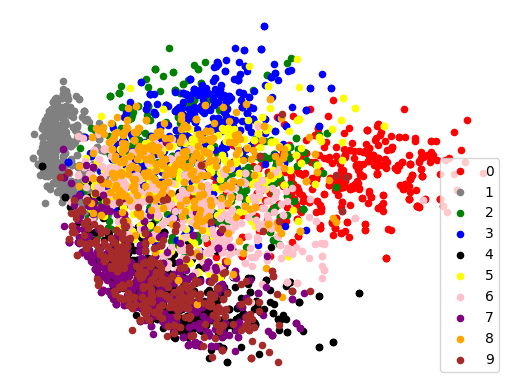

In [20]:
from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd
import matplotlib.pyplot as plt
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(train_images))

print(train_images.shape,transformed.shape)
plt.axis("off")
plt.scatter(transformed[train_labels ==0][0], transformed[train_labels==0][1], s=20, label='0',
c='red')
plt.scatter(transformed[train_labels==1][0], transformed[train_labels==1][1], s=20, label='1',
c='gray')
plt.scatter(transformed[train_labels ==2][0], transformed[train_labels==2][1], s=20, label='2',
c='green')
plt.scatter(transformed[train_labels==3][0], transformed[train_labels==3][1], s=20, label='3',
c='blue')
plt.scatter(transformed[train_labels==4][0], transformed[train_labels==4][1], s=20, label='4',
c='black')
plt.scatter(transformed[train_labels==5][0], transformed[train_labels==5][1], s=20, label='5',
c='yellow')
plt.scatter(transformed[train_labels==6][0], transformed[train_labels==6][1], s=20, label='6',
c='pink')
plt.scatter(transformed[train_labels==7][0], transformed[train_labels==7][1], s=20, label='7',
c='purple')
plt.scatter(transformed[train_labels==8][0], transformed[train_labels==8][1], s=20, label='8',
c='orange')
plt.scatter(transformed[train_labels==9][0], transformed[train_labels==9][1], s=20, label='9',
c='brown')
plt.legend()
plt.show()

#### thư viện của gói linear_model, lớp LogisticRegression

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(fit_intercept = False,solver='sag',multi_class='multinomial',max_iter = 10000)
logr.fit(X_train.T,train_labels)
y_pred = logr.predict(X_test.T)
print('accuracy testing data: ',accuracy_score(test_labels,y_pred))


accuracy testing data:  0.8652


*sau khi chạy thử bằng thuật toán tự code và thư viện, độ chính xác chạy bằng thư viện cao hơn hẳn, nguyên dân có thể do điều kiện dừng của thuật toán tự code, điều kiện dừng này làm cho thuật toán nhanh chóng hội tụ tới cực tiểu địa phương mà không hội tụ tại cực tiểu toàn cục.*